In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Проверим корректность геокодирования. Первый критерий: район города, в котором оказалась точка и указанный в датасете должны совпадать

In [10]:
points = gpd.read_file('shapes/coordinates/coordinates.shp', encoding='utf-8')
points = points.set_index('index')
points.head()

geometry
index                           
74     POINT (30.29117 59.94074)
126    POINT (30.26898 59.94458)
161    POINT (30.27297 59.94482)
166    POINT (30.27618 59.93543)
215    POINT (30.28819 59.94392)

In [13]:
data = pd.read_csv('data/housing_data.csv')
data.head(2)

addr_street addr_number addr_building addr_letter addr_district  \
0  Королева пр.          31             1           В    Приморский   
1    Дачный пр.          33             1           А     Кировский   

          comm_type comm_num comm_room_num   data_series data_buildingdate  \
0           3 комн.        1             3           NaN              1986   
1  2 комн., 3 комн.     2, 2          4, 6  1-528 КП- 42              1966   

   ...                                       param_ukname  param_failure  \
0  ...                                           ЖСК 1236            0.0   
1  ...  Общество с ограниченной ответственностью "Жилк...            0.0   

                                         repair_year  \
0                                               2014   
1  2002; 2004; 2004; 2004; 2005; 2007; 2008; 2009...   

                                          repair_job  rfc_shaftcount  \
0  Капитальный ремонт лифтов с частичной заменой ...             4.0   
1  Благоустройство придомовой территории; Благоус...             5.0   

   roof_metalarea  seng_liftcount  seng_pzu  special_basementarea  number  
0             NaN             4.0       NaN                 916.9       1  
1             NaN             5.0       5.0                1444.0       2  

[2 rows x 47 columns]

In [15]:
districts = gpd.read_file('shapes/districts/districts.shp', encoding='utf-8')
districts.head()

addr_distr                                           geometry
0      Колпинский  POLYGON ((30.44151 59.82945, 30.44333 59.82980...
1      Пушкинский  POLYGON ((30.21822 59.67307, 30.21918 59.67361...
2      Московский  POLYGON ((30.19877 59.80161, 30.19908 59.80178...
3  Красносельский  MULTIPOLYGON (((30.04560 59.76554, 30.05226 59...
4  Петродворцовый  POLYGON ((29.64754 59.92986, 29.64951 59.93017...

In [63]:
landuse = gpd.read_file('shapes/landuse_polygons/landuse_polygons.shp')

In [65]:
landuse[landuse['LANDUSE'] == 'industrial']

OSM_ID     LANDUSE RSDNTL  \
19     125872155.0  industrial   None   
20     125770065.0  industrial   None   
49     185243239.0  industrial   None   
50     175897185.0  industrial   None   
55     105075249.0  industrial   None   
...            ...         ...    ...   
12495   38506262.0  industrial   None   
12532   -2308596.0  industrial   None   
12549  210000604.0  industrial   None   
12552   -2818724.0  industrial   None   
12554  133775797.0  industrial   None   

                                                geometry  
19     POLYGON ((29.52322 60.19621, 29.52388 60.19709...  
20     POLYGON ((29.52493 60.19241, 29.52603 60.19264...  
49     POLYGON ((29.64977 59.92986, 29.66561 59.93372...  
50     POLYGON ((29.65839 60.19822, 29.65899 60.19903...  
55     POLYGON ((29.66912 59.92132, 29.67007 59.92233...  
...                                                  ...  
12495  POLYGON ((30.63212 59.77841, 30.63347 59.77896...  
12532  POLYGON ((30.66295 59.78606, 30.66365 59.78653...  
12549  POLYGON ((30.68933 59.77695, 30.68954 59.77695...  
12552  POLYGON ((30.69103 59.77430, 30.69142 59.77459...  
12554  POLYGON ((30.71166 59.77250, 30.71803 59.77824...  

[1269 rows x 4 columns]

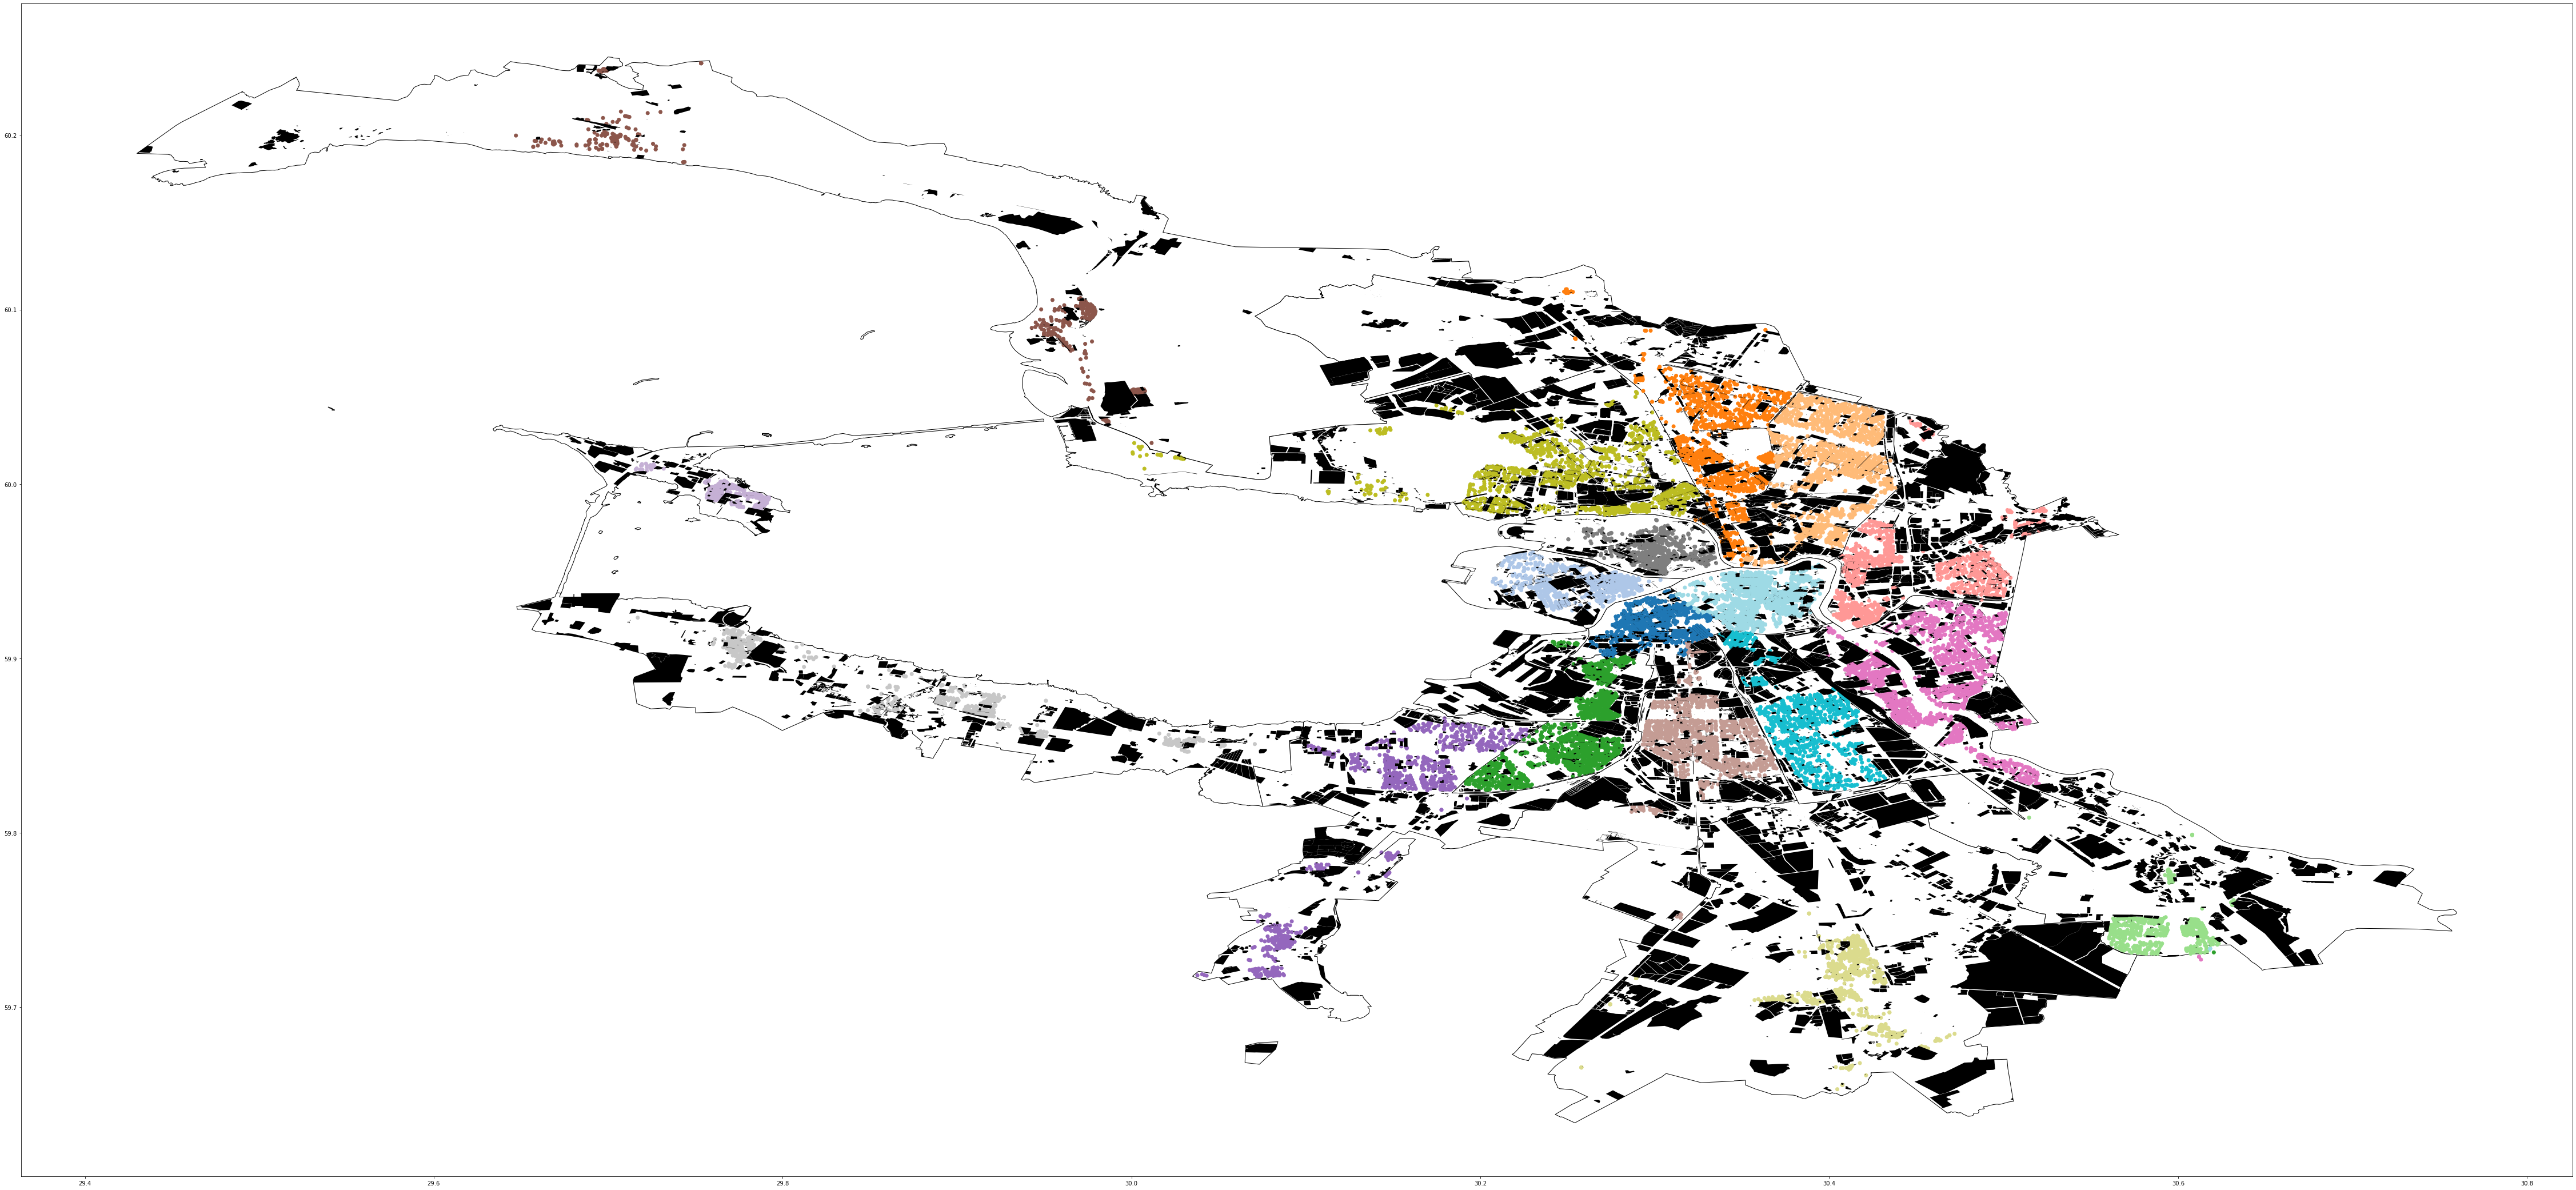

In [73]:
houses = gpd.GeoDataFrame(data[['addr_district', ]].join(points), geometry='geometry', crs={'init': 'epsg:4326'})
fig, ax = plt.subplots(figsize=(80, 80))
districts.plot(ax=ax, color='white', edgecolor='k')
houses.plot(column='addr_district', cmap='tab20', ax=ax)
landuse[landuse['LANDUSE'] != 'residential'].plot(facecolor="k", ax=ax)

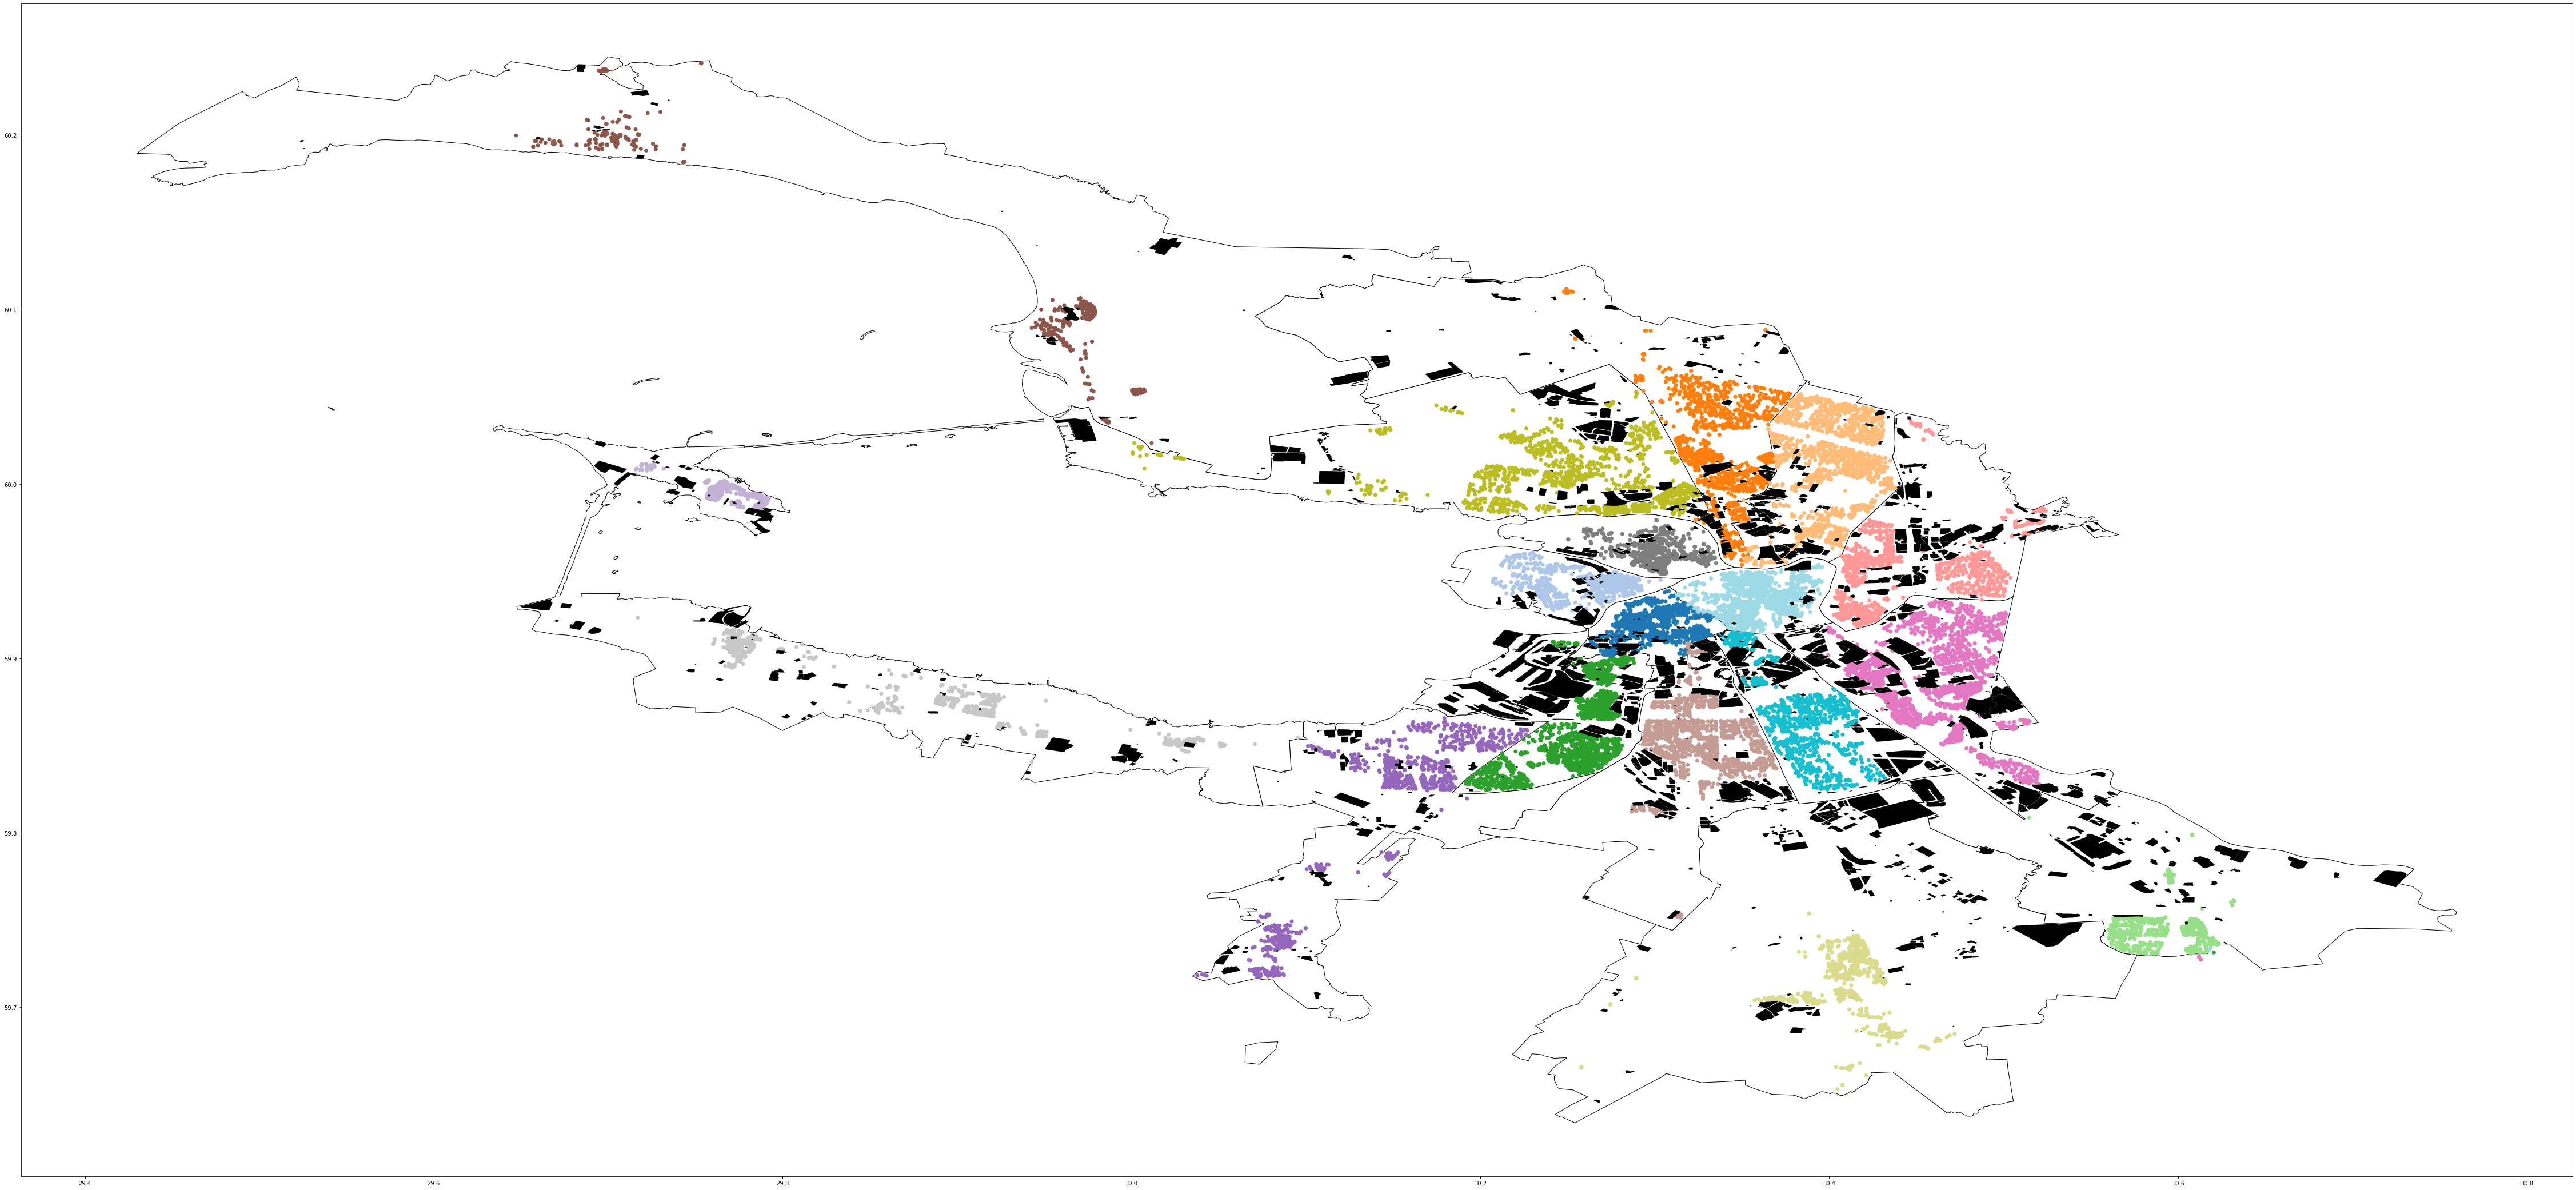

In [75]:
fig, ax = plt.subplots(figsize=(80, 80))
districts.plot(ax=ax, color='white', edgecolor='k')
houses.plot(column='addr_district', cmap='tab20', ax=ax)
landuse[landuse['LANDUSE'] == 'industrial'].plot(facecolor="k", ax=ax)

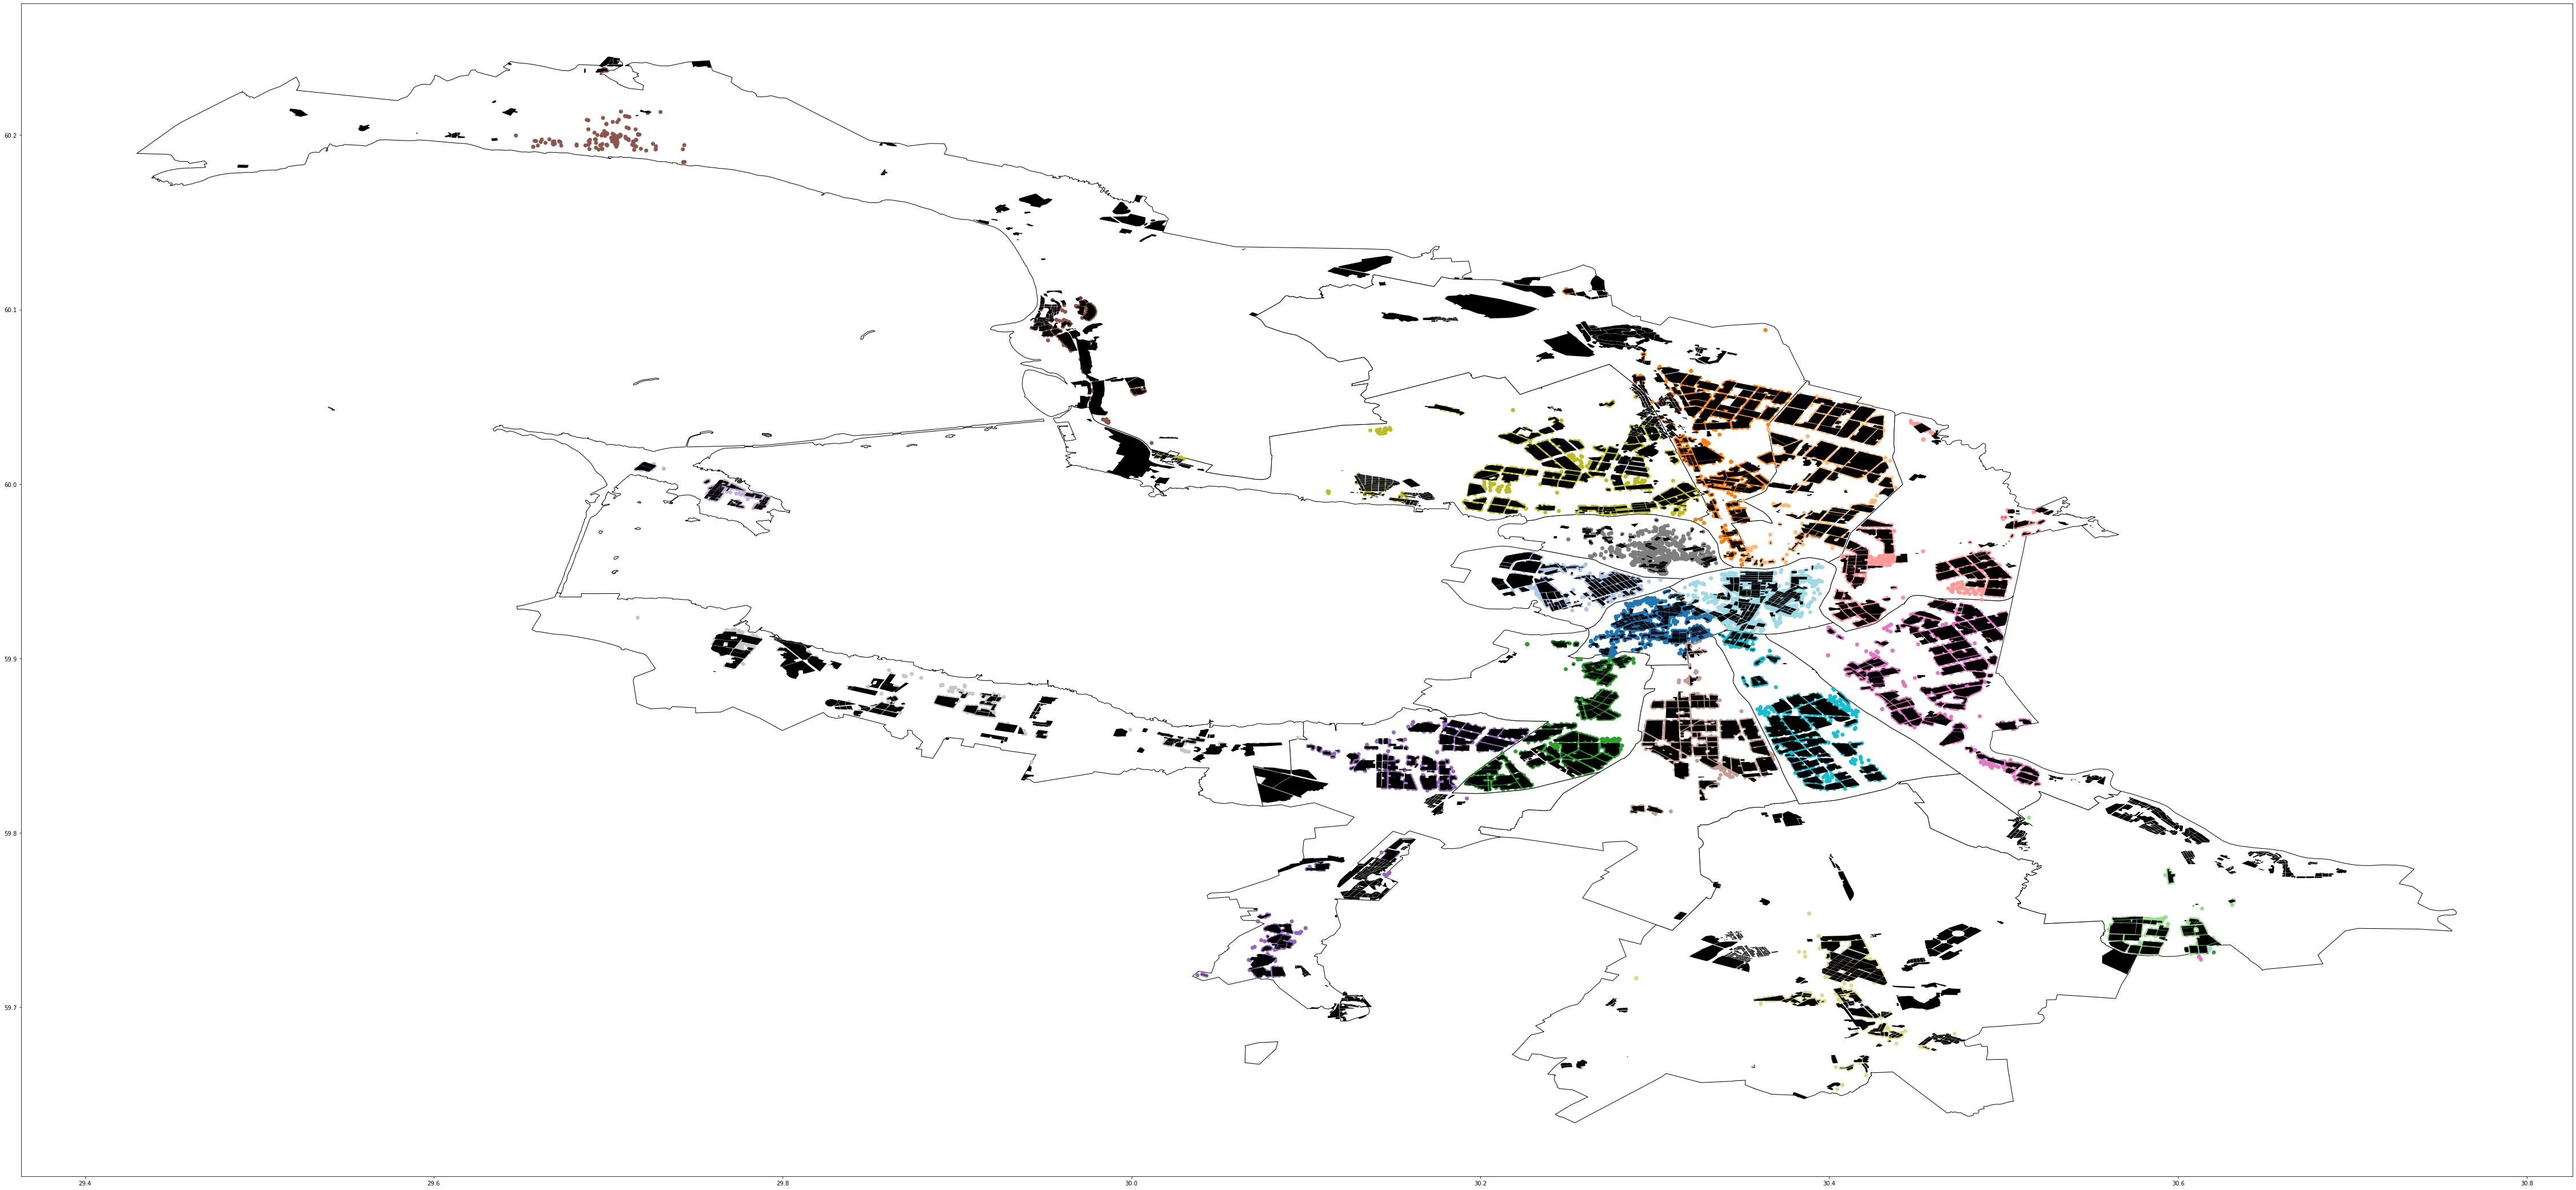

In [76]:
fig, ax = plt.subplots(figsize=(80, 80))
districts.plot(ax=ax, color='white', edgecolor='k')
houses.plot(column='addr_district', cmap='tab20', ax=ax)
landuse[landuse['LANDUSE'] == 'residential'].plot(facecolor="k", ax=ax)

In [28]:
check = gpd.sjoin(districts, houses, op='contains')
print(check.shape)
check.head(2)

(19116, 4)


addr_distr                                           geometry  index_right  \
0  Колпинский  POLYGON ((30.44151 59.82945, 30.44333 59.82980...        15010   
0  Колпинский  POLYGON ((30.44151 59.82945, 30.44333 59.82980...         6917   

  addr_district  
0    Колпинский  
0    Колпинский

Для загеокодированных 19100 объектов только 6 находятся не в своих районах, это объекты на границах районов. 

In [30]:
check[check['addr_distr'] != check['addr_district']]

addr_distr                                           geometry  \
7   Адмиралтейский  POLYGON ((30.25023 59.90129, 30.25028 59.90132...   
7   Адмиралтейский  POLYGON ((30.25023 59.90129, 30.25028 59.90132...   
7   Адмиралтейский  POLYGON ((30.25023 59.90129, 30.25028 59.90132...   
7   Адмиралтейский  POLYGON ((30.25023 59.90129, 30.25028 59.90132...   
17      Приморский  POLYGON ((29.95528 60.03746, 29.95527 60.03782...   
17      Приморский  POLYGON ((29.95528 60.03746, 29.95527 60.03782...   

    index_right addr_district  
7          4758    Московский  
7         12233    Московский  
7           243    Московский  
7           359    Московский  
17        18245    Выборгский  
17         6299    Выборгский

Без геокодирования остаются порядка 3100 записей. Это около 14% датасета. Попробуем определить причины

In [47]:
rest = data.drop(points.index)
print(rest.shape)
rest.head()

(3119, 47)


addr_street addr_number addr_building addr_letter  \
0                    Королева пр.          31             1           В   
5                       Пр. Славы           2             2           А   
7   пос.Металлострой, ул. Полевая          25           NaN           А   
17                  Панфилова ул.          5А           NaN           А   
20                Ж. Егоровой ул.          12             1           А   

        addr_district                  comm_type comm_num comm_room_num  \
0          Приморский                    3 комн.        1             3   
5         Фрунзенский           2 комн., 3 комн.     7, 4        14, 12   
7          Колпинский                    3 комн.       12            36   
17  Красногвардейский                    2 комн.        3             6   
20         Выборгский  2 комн., 3 комн., 4 комн.  3, 4, 3     6, 12, 12   

       data_series data_buildingdate  ...  \
0              NaN              1986  ...   
5        I-528КП41              1965  ...   
7         1-ЛГ504Д              1983  ...   
17  Индивидуальный              1917  ...   
20        1 ЛГ 504              1985  ...   

                                         param_ukname  param_failure  \
0                                            ЖСК 1236            0.0   
5          ООО "Жилкомсервис № 1 Фрунзенского района"            0.0   
7                         ООО "Рыбацкое -Стройсервис"            0.0   
17   ООО "Жилкомсервис  №1 Красногвардейского района"            0.0   
20  Общество с ограниченной ответственностью Жилко...            0.0   

    repair_year                                         repair_job  \
0          2014  Капитальный ремонт лифтов с частичной заменой ...   
5    2002; 2004  Капитальный ремонт лифтов с частичной заменой ...   
7    1996; 2000  Герметизация горизонтальных и вертикальных сты...   
17   2007; 2008  Ремонт конструкций и замена покрытий крыш; Рем...   
20   1996; 2007  Благоустройство придомовой территории; Ремонт ...   

    rfc_shaftcount  roof_metalarea  seng_liftcount  seng_pzu  \
0              4.0             NaN             4.0       NaN   
5              4.0             NaN             4.0       4.0   
7              6.0             NaN             6.0       6.0   
17             NaN           532.0             NaN       NaN   
20             7.0             NaN             7.0       7.0   

    special_basementarea  number  
0                 916.90       1  
5                1622.81       6  
7                1695.00       8  
17                426.00      18  
20               1991.00      21  

[5 rows x 47 columns]

In [36]:
rest.groupby('addr_district').count()

addr_street  addr_number  addr_building  addr_letter  \
addr_district                                                             
Адмиралтейский             186          186              0          185   
Василеостровский           253          253              6          253   
Выборгский                 209          209             77          208   
Калининский                119          119             53          114   
Кировский                  114          114             36          114   
Колпинский                 208          208             11          208   
Красногвардейский          134          134             34          134   
Красносельский             129          129             68          129   
Кронштадтский                8            8              1            7   
Курортный                  428          428             27          411   
Московский                  28           28              5           28   
Невский                     18           18              8           18   
Петроградский              318          318              2          318   
Петродворцовый              67           67             19           64   
Приморский                 206          206            103          206   
Пушкинский                 354          354            102          352   
Фрунзенский                102          102             51          102   
Центральный                238          238              1          238   

                   comm_type  comm_num  comm_room_num  data_series  \
addr_district                                                        
Адмиралтейский           148       148            148          186   
Василеостровский         202       202            202          231   
Выборгский                92        92             92          168   
Калининский               59        59             59           96   
Кировский                 34        34             34          112   
Колпинский               108       108            108          191   
Красногвардейский         80        80             80          105   
Красносельский            52        52             52          107   
Кронштадтский              5         5              5            7   
Курортный                172       172            172          110   
Московский                17        17             17           28   
Невский                    3         3              3           14   
Петроградский            254       254            254          280   
Петродворцовый            41        41             41           64   
Приморский               112       112            112          106   
Пушкинский               139       139            139          234   
Фрунзенский               59        59             59           96   
Центральный              189       189            189          216   

                   data_buildingdate  data_reconstructiondate  ...  \
addr_district                                                  ...   
Адмиралтейский                   186                       97  ...   
Василеостровский                 253                       84  ...   
Выборгский                       209                        7  ...   
Калининский                      119                        9  ...   
Кировский                        114                        2  ...   
Колпинский                       208                        7  ...   
Красногвардейский                134                        8  ...   
Красносельский                   129                        2  ...   
Кронштадтский                      8                        5  ...   
Курортный                        428                       37  ...   
Московский                        28                        2  ...   
Невский                           18                        2  ...   
Петроградский                    318                       79  ...   
Петродворцовый                    67                        3  ... 

Улицы с самым большим числом незакодированных адресов имеют сложное название: настандартные сокращения, устаревшее именование административных единиц, букву ё.

Иными словами, перевод этих названий в требуемый osm формат -- задача каждый раз индивидуальная

In [52]:
rest.groupby('addr_street').count().sort_values('addr_number', ascending=False)

addr_number  addr_building  addr_letter  \
addr_street                                                             
Лени Голикова ул.                      98             31           98   
Грибоедова наб.кан.                    74              0           74   
Большой П.С. пр.                       66              0           66   
г.Пушкин, Саперная ул.                 64             34           64   
Пр. Славы                              60             30           60   
...                                   ...            ...          ...   
пос. Комарово, Сосновая ул.             1              1            1   
Пионерстроя ул.                         1              1            1   
пос. Комарово, ул. Танкистов            1              1            1   
Перфильева ул.                          1              0            1   
Троицкая пл.                            1              0            1   

                              addr_district  comm_type  comm_num  \
addr_street                                                        
Лени Голикова ул.                        98         29        29   
Грибоедова наб.кан.                      74         64        64   
Большой П.С. пр.                         66         60        60   
г.Пушкин, Саперная ул.                   64         12        12   
Пр. Славы                                60         40        40   
...                                     ...        ...       ...   
пос. Комарово, Сосновая ул.               1          0         0   
Пионерстроя ул.                           1          0         0   
пос. Комарово, ул. Танкистов              1          0         0   
Перфильева ул.                            1          0         0   
Троицкая пл.                              1          1         1   

                              comm_room_num  data_series  data_buildingdate  \
addr_street                                                                   
Лени Голикова ул.                        29           96                 98   
Грибоедова наб.кан.                      64           74                 74   
Большой П.С. пр.                         60           66                 66   
г.Пушкин, Саперная ул.                   12           59                 64   
Пр. Славы                                40           58                 60   
...                                     ...          ...                ...   
пос. Комарово, Сосновая ул.               0            0                  1   
Пионерстроя ул.                           0            1                  1   
пос. Комарово, ул. Танкистов              0            0                  1   
Перфильева ул.                            0            1                  1   
Троицкая пл.                              1            1                  1   

                              data_reconstructiondate  ...  param_ukname  \
addr_street                                            ...                 
Лени Голикова ул.                                   1  ...            98   
Грибоедова наб.кан.                                46  ...            73   
Большой П.С. пр.                                   16  ...            66   
г.Пушкин, Саперная ул.                             10  ...            64   
Пр. Славы                                           2  ...            60   
...                                               ...  ...           ...   
пос. Комарово, Сосновая ул.                         0  ...             1   
Пионерстроя ул.                                     0  ...             1   
пос. Комарово, ул. Танкистов                        0  ...             1   
Перфильева ул.                                      0  ...             1   
Троицкая пл.                                        0  ...             1   

                              param_failure  repair_year  repair_job  \
addr_street                                                            
Лени Голикова ул.                 

In [ ]:
{'Лени Голикова': 'Лёни Голикова'
'Грибоедова наб.кан.':'Набережная канала Грибоедова'}